<a href="https://colab.research.google.com/github/RodAnC2210/first_stepsDS/blob/main/DS_C3_SC1_RodrigoAntonioCabellodelaRosa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## RETO: EXPLORANDO EL ÍNDICE DE FELICIDAD
---

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
pd.options.display.max_rows = 8
pd.options.display.max_columns = 10

In [6]:
# Guarda en un dataframe (happiness) todos los registros del archivo Happiness_report.csv.

happiness = pd.read_csv('/content/Happiness_report.csv')
happiness

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
...,...,...,...,...,...,...,...,...,...
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035
155,156,South Sudan,2.853,0.306,0.575,0.295,0.010,0.202,0.091


In [7]:
mexico = happiness.loc[happiness['Country or region']=='Mexico']
mexico = mexico.set_index('Country or region')
mexico

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,,,
Mexico,23,6.595,1.07,1.323,0.861,0.433,0.074,0.073


In [8]:
sns.set_palette('Set2')
sns.set_style('darkgrid')

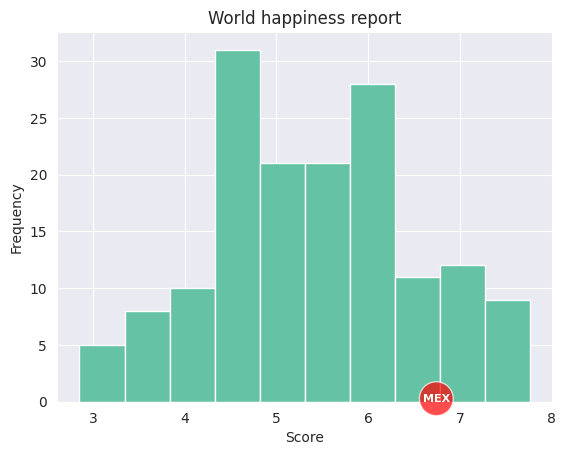

In [9]:
plt.hist('Score', data=happiness)
plt.title('World happiness report')
plt.xlabel('Score')
plt.ylabel('Frequency')
mex_value = happiness[happiness['Country or region'] == 'Mexico']['Score'].values[0]
plt.annotate('MEX', xy=(mex_value, 0), xytext=(mex_value,0),
             bbox=dict(boxstyle='circle,pad=0.3', facecolor='red',alpha=0.7),
             color='white', fontsize='8', fontweight ='bold')
plt.show()

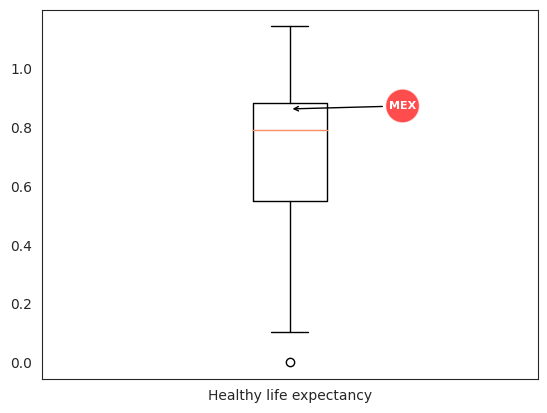

In [10]:
# Construye un boxplot para la columna esperanza de vida (Healthy life expectancy). Ubica el valor de México con una anotación.

sns.set_style('white')
sns.set_palette('Set2')
plt.boxplot(happiness['Healthy life expectancy'].dropna(), labels=['Healthy life expectancy'])
mex_hle = happiness.loc[happiness['Country or region']=='Mexico']['Healthy life expectancy'].values[0]
plt.annotate('MEX', xy=(1,mex_hle), xytext=(1.2, mex_hle),
             bbox=dict(boxstyle='circle,pad=0.3', facecolor='red', alpha=0.7),
             color='white', fontsize='8', fontweight='bold',
             arrowprops=dict(arrowstyle='->', color='black'))
plt.show()

In [11]:
factors_mexico = mexico.drop(['Overall rank', 'Score'], axis=1).T
factors_mexico.columns=['Factors']
factors_mexico

,Factors
GDP per capita,1.070
Social support,1.323
Healthy life expectancy,0.861
Freedom to make life choices,0.433
Generosity,0.074
Perceptions of corruption,0.073


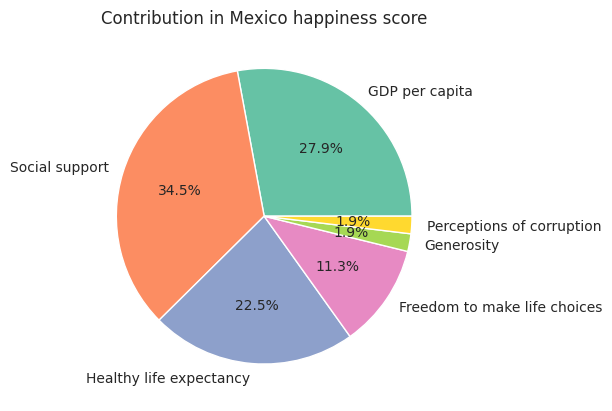

In [12]:
plt.pie(factors_mexico['Factors'], labels=factors_mexico.index, autopct='%1.1f%%')
plt.title('Contribution in Mexico happiness score')
plt.show()

In [13]:
# Filtra el dataframe para quedarte con 5 países (el más feliz, el menos feliz, México y dos más de tu interés) y visualiza en una misma gráfica los 6 factores.
country = happiness[happiness['Country or region'].isin(['Mexico', 'Germany', 'China'])]
first = happiness.iloc[[0]]
last = happiness.iloc[[-1]]
countries = pd.concat([country, first, last], ignore_index=True)
countries = countries.drop(['Overall rank', 'Score'], axis=1)
countries


,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Germany,1.373,1.454,0.987,0.495,0.261,0.265
1,Mexico,1.070,1.323,0.861,0.433,0.074,0.073
2,China,1.029,1.125,0.893,0.521,0.058,0.100
3,Finland,1.340,1.587,0.986,0.596,0.153,0.393
4,South Sudan,0.306,0.575,0.295,0.010,0.202,0.091


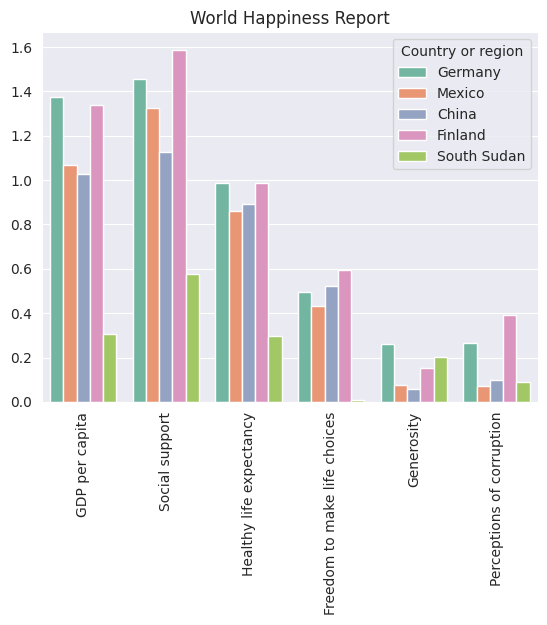

In [14]:
melted_countries = countries.melt(id_vars=['Country or region'], var_name='Factors', value_name='Values')

sns.set_style('darkgrid')
sns.barplot(data=melted_countries, x='Factors', y='Values', hue='Country or region')
plt.title('World Happiness Report')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=90)
plt.show()

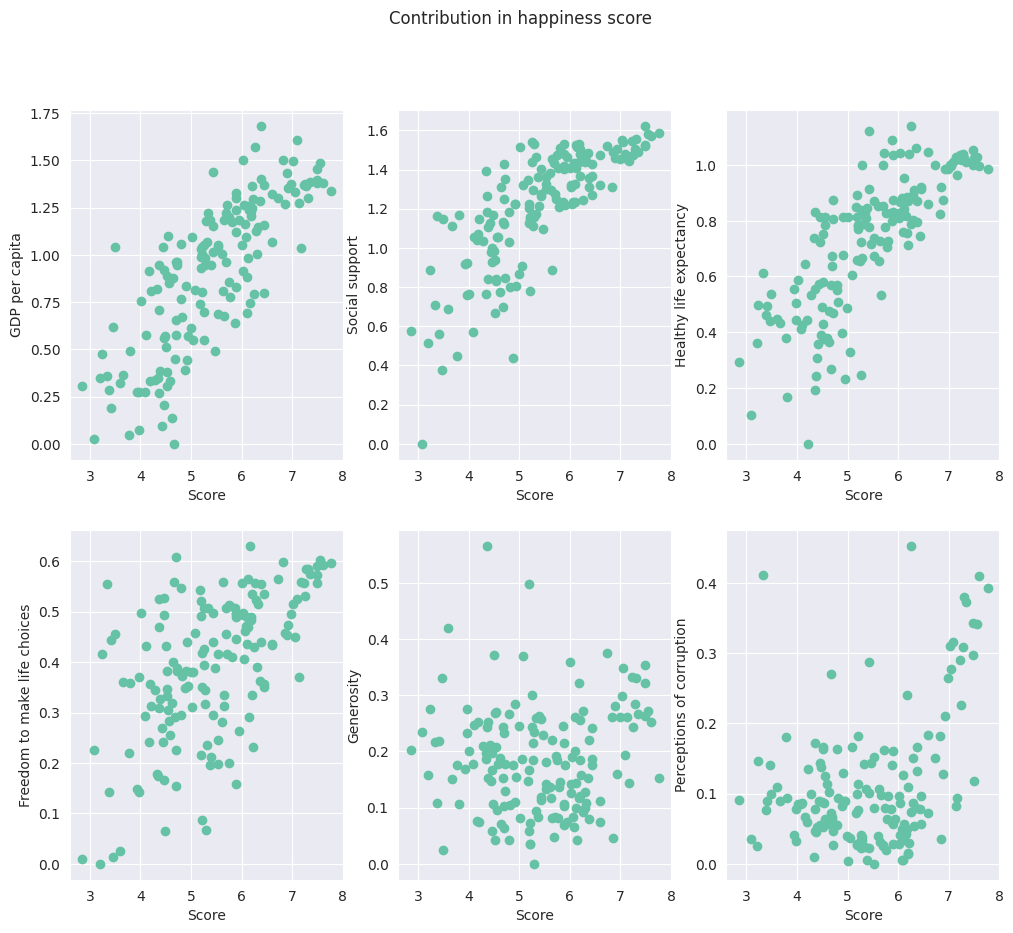

In [15]:
# Crea una matriz de subgráficas de 2 x 3 con scatter plots del puntaje (score) versus los 6 factores, para determinar qué factor influye más en la evaluación.

fig, axs= plt.subplots(2,3, figsize=(12,10))

axs[0,0].scatter(x='Score', y='GDP per capita', data=happiness)
axs[0,0].set_xlabel('Score')
axs[0,0].set_ylabel('GDP per capita')

axs[0,1].scatter(x='Score', y='Social support', data=happiness)
axs[0,1].set_xlabel('Score')
axs[0,1].set_ylabel('Social support')

axs[0,2].scatter(x='Score', y='Healthy life expectancy', data=happiness)
axs[0,2].set_xlabel('Score')
axs[0,2].set_ylabel('Healthy life expectancy')

axs[1,0].scatter(x='Score', y='Freedom to make life choices', data=happiness)
axs[1,0].set_xlabel('Score')
axs[1,0].set_ylabel('Freedom to make life choices')

axs[1,1].scatter(x='Score', y='Generosity', data=happiness)
axs[1,1].set_xlabel('Score')
axs[1,1].set_ylabel('Generosity')

axs[1,2].scatter(x='Score', y='Perceptions of corruption', data=happiness)
axs[1,2].set_xlabel('Score')
axs[1,2].set_ylabel('Perceptions of corruption')

fig.suptitle('Contribution in happiness score')
plt.show()

In [16]:
#Comprueba lo anterior con un heatmap donde incluyas los índices de correlación.

correlation = happiness.drop(['Overall rank', 'Country or region'], axis=1)
correlation

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,7.494,1.380,1.624,1.026,0.591,0.354,0.118
...,...,...,...,...,...,...,...
152,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,3.083,0.026,0.000,0.105,0.225,0.235,0.035
155,2.853,0.306,0.575,0.295,0.010,0.202,0.091


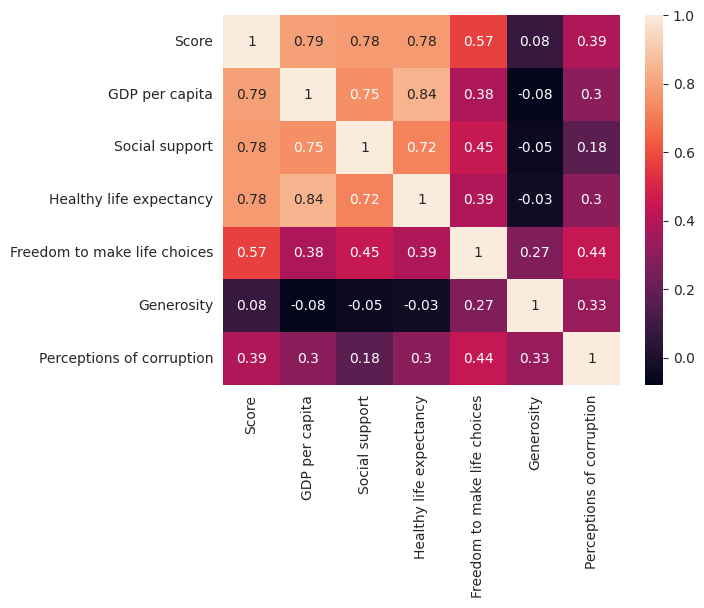

In [17]:
sns.heatmap(correlation.corr().round(2), annot=True)
plt.show()

In [18]:
# Combina con el dataframe metada (Metadata.csv) para graficar la felicidad promedio por región.

metadata = pd.read_csv('/content/retoMetadata.csv')
metadata

,Country Code,Region,IncomeGroup,SpecialNotes,TableName
0,ABW,Latin America & Caribbean,High income,NaN,Aruba
1,AFG,South Asia,Low income,NaN,Afghanistan
2,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola
3,ALB,Europe & Central Asia,Upper middle income,NaN,Albania
...,...,...,...,...,...
259,YEM,Middle East & North Africa,Low income,NaN,"Yemen, Rep."
260,ZAF,Sub-Saharan Africa,Upper middle income,Fiscal year end: March 31; reporting period fo...,South Africa
261,ZMB,Sub-Saharan Africa,Lower middle income,National accounts data were rebased to reflect...,Zambia
262,ZWE,Sub-Saharan Africa,Lower middle income,NaN,Zimbabwe


In [19]:
metadata.rename(columns={'TableName':'Country or region'}, inplace=True)
region = pd.merge(happiness, metadata, on='Country or region', how='inner')
region

,Overall rank,Country or region,Score,GDP per capita,Social support,...,Perceptions of corruption,Country Code,Region,IncomeGroup,SpecialNotes
0,1,Finland,7.769,1.340,1.587,...,0.393,FIN,Europe & Central Asia,High income,A simple multiplier is used to convert the nat...
1,2,Denmark,7.600,1.383,1.573,...,0.410,DNK,Europe & Central Asia,High income,NaN
2,3,Norway,7.554,1.488,1.582,...,0.341,NOR,Europe & Central Asia,High income,NaN
3,4,Iceland,7.494,1.380,1.624,...,0.118,ISL,Europe & Central Asia,High income,NaN
...,...,...,...,...,...,...,...,...,...,...,...
132,153,Tanzania,3.231,0.476,0.885,...,0.147,TZA,Sub-Saharan Africa,Lower middle income,NaN
133,154,Afghanistan,3.203,0.350,0.517,...,0.025,AFG,South Asia,Low income,NaN
134,155,Central African Republic,3.083,0.026,0.000,...,0.035,CAF,Sub-Saharan Africa,Low income,NaN
135,156,South Sudan,2.853,0.306,0.575,...,0.091,SSD,Sub-Saharan Africa,Low income,NaN


In [20]:
grouped_reg = region.groupby('Region')['Score'].mean().reset_index()
grouped_reg

,Region,Score
0,East Asia & Pacific,5.658769
1,Europe & Central Asia,6.104174
2,Latin America & Caribbean,6.007579
3,Middle East & North Africa,5.757429
4,North America,7.085000
5,South Asia,4.526857
6,Sub-Saharan Africa,4.260000


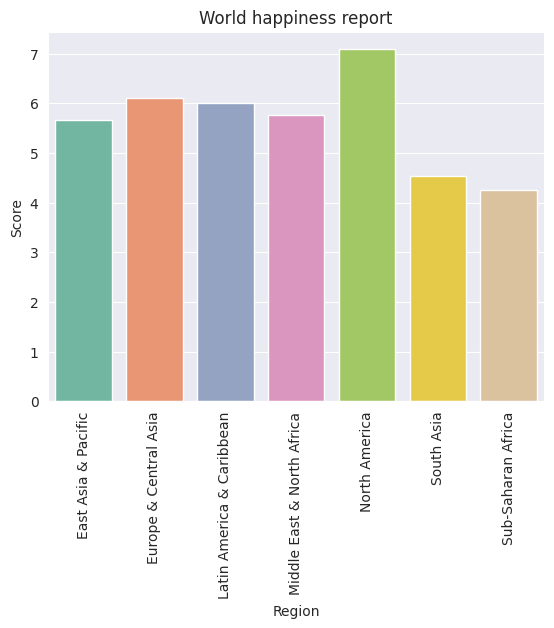

In [21]:
sns.barplot(x='Region', y='Score', data=grouped_reg, hue='Region')
plt.title('World happiness report')
plt.xticks(rotation=90)
plt.show()